##  Multiple and Polynomial Regression 


## Learning Goals
<li> Revisit pandas dataframe</li>

<li> Plot the diurnal variation for time series data with the groupby in the boxplot</li>

<li> Revisit simple linear Regression</li>
<li> Simple linear Regression with CI</li>

<li> Multiple regression with Polynomial features </li>
</ol>

In [51]:
# import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

from pandas.plotting import scatter_matrix

import seaborn as sns
from sklearn.linear_model import LinearRegression


### Revisit pandas dataframe

Read the dataset_1 with contains Number of Taxi Pickups and Time of Day (min) into pandas dataframe

In [52]:
# read in the data pd.read_cs also works for txt file
cab_df = pd.read_csv("data/dataset_1.txt")

In [ ]:
# Explore the data with column head and descriptive feactures
# you code here

In [53]:
cab_df.head()

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


In [54]:
cab_df.describe()

,TimeMin,PickupCount
count,1250.00000,1250.000000
mean,702.46800,33.230400
std,405.49001,19.136391
min,4.00000,1.000000
25%,361.50000,17.000000
50%,688.50000,33.000000
75%,1046.75000,46.000000
max,1438.00000,116.000000


In [55]:
cab_df.columns

Index(['TimeMin', 'PickupCount'], dtype='object')

In [56]:
# make a new dataframe called train_data with the cad_df data 
# try it with train_data=cab_df
train_data=cab_df

In [57]:
# Create an hour column
train_data['Hour'] = train_data['TimeMin'] // 60


In [113]:
# Explore the data with column head 

In [58]:
train_data

,TimeMin,PickupCount,Hour
0,860.0,33.0,14.0
1,17.0,75.0,0.0
2,486.0,13.0,8.0
3,300.0,5.0,5.0
4,385.0,10.0,6.0
...,...,...,...
1245,635.0,27.0,10.0
1246,580.0,16.0,9.0
1247,159.0,5.0,2.0
1248,45.0,17.0,0.0


In [59]:
cab_df

,TimeMin,PickupCount,Hour
0,860.0,33.0,14.0
1,17.0,75.0,0.0
2,486.0,13.0,8.0
3,300.0,5.0,5.0
4,385.0,10.0,6.0
...,...,...,...
1245,635.0,27.0,10.0
1246,580.0,16.0,9.0
1247,159.0,5.0,2.0
1248,45.0,17.0,0.0


In Python, when you assign a variable like

train_data =cab_df, both variables point to the same object in memory. 

This means if you modify the object via one of these variables, the change will be reflected when you access the object through the other variable.

If you want train_data to be a separate copy of cab_df so that changes in train_data do not affect cab_df, you need to make a copy of cab_df. Here's how you can do it:

In [114]:
# try all again with train_data=cab_df.copy() and see the difference
# start from cab_df = pd.read_csv("data/dataset_1.txt")
cab_df = pd.read_csv("data/dataset_1.txt")
train_data=cab_df.copy()
train_data

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0
...,...,...
1245,635.0,27.0
1246,580.0,16.0
1247,159.0,5.0
1248,45.0,17.0


In [115]:
train_data['Hour'] = train_data['TimeMin'] // 60


In [116]:
train_data

,TimeMin,PickupCount,Hour
0,860.0,33.0,14.0
1,17.0,75.0,0.0
2,486.0,13.0,8.0
3,300.0,5.0,5.0
4,385.0,10.0,6.0
...,...,...,...
1245,635.0,27.0,10.0
1246,580.0,16.0,9.0
1247,159.0,5.0,2.0
1248,45.0,17.0,0.0


In [65]:
cab_df

,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0
...,...,...
1245,635.0,27.0
1246,580.0,16.0
1247,159.0,5.0
1248,45.0,17.0


### Plot the data with scatter plot

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

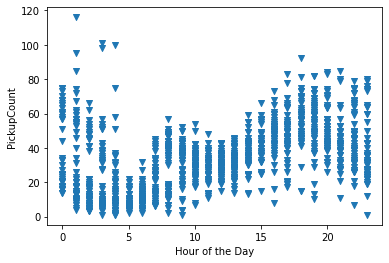

In [66]:
plt.scatter(train_data['Hour'],train_data['PickupCount'],marker='v')
plt.xlabel('Hour of the Day')
plt.ylabel('PickupCount')
plt.show()

### Plot the data with histgram

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

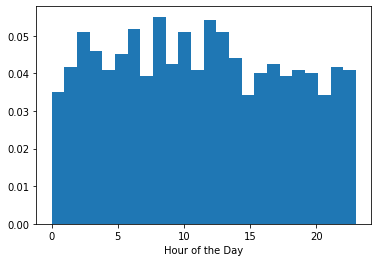

In [67]:
plt.hist(train_data['Hour'],bins=24,density=True)
plt.xlabel('Hour of the Day')
plt.show()

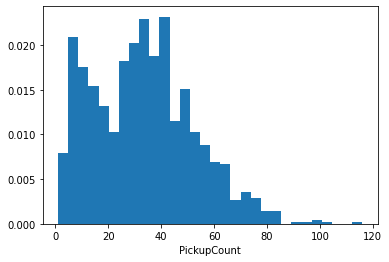

In [18]:
plt.hist(train_data['PickupCount'],bins=30,density=True)
plt.xlabel('PickupCount')
plt.show()

### Plot the data with seaborn

    
https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='PickupCount', ylabel='Count'>

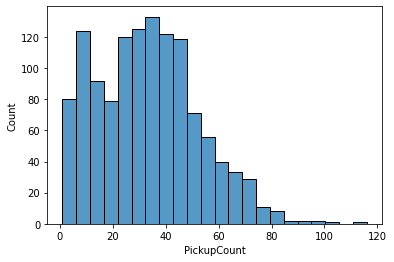

In [19]:
sns.histplot( data=train_data, x='PickupCount')

<Axes: xlabel='PickupCount', ylabel='Count'>

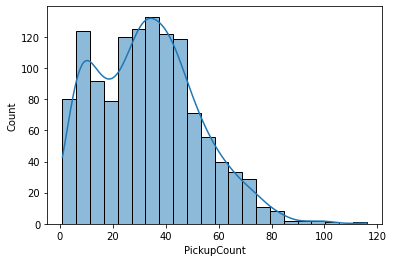

In [20]:
sns.histplot( data=train_data, x='PickupCount', kde=True)

### Plot the diurnal variation for time series data with the groupby in the boxplot</li>


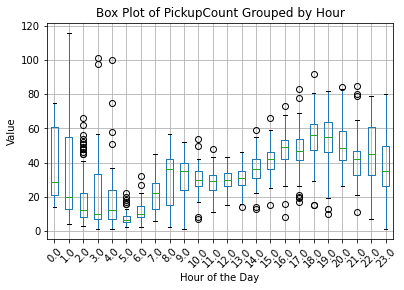

In [21]:
train_data.boxplot(column='PickupCount', by='Hour') # This is the key!

plt.title('Box Plot of PickupCount Grouped by Hour')
plt.suptitle('')   # Removes the default subtitle to clean up the plot title
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.xticks(fontsize=10, rotation=45)
plt.show()

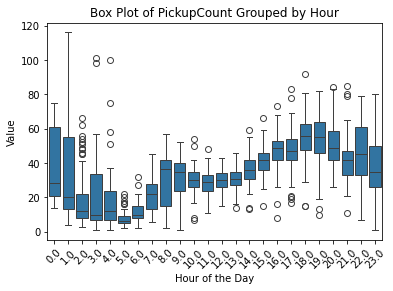

In [22]:
# Creating the box plot
sns.boxplot(x='Hour', y='PickupCount', data=train_data) # This is the key!
plt.title('Box Plot of PickupCount Grouped by Hour')

plt.suptitle('')   # Removes the default subtitle to clean up the plot title
plt.xlabel('Hour of the Day')
plt.ylabel('Value')
plt.xticks(fontsize=10, rotation=45)
plt.show()

### Question: 
What if we want to add the average data for each group?

In [23]:
hourly_means = train_data.groupby('Hour')['PickupCount'].mean()

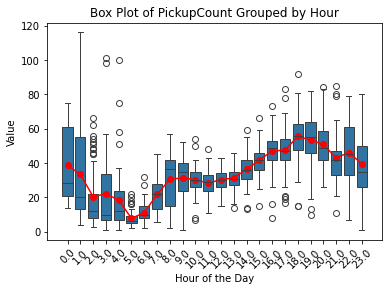

In [24]:
sns.boxplot(x='Hour', y='PickupCount', data=train_data)
plt.plot(hourly_means.index, hourly_means, color='red', marker='o', label='Hourly Average')
plt.xlabel('Hour of the Day')
plt.suptitle('')  # Removes the default subtitle to clean up the plot title
plt.title('Box Plot of PickupCount Grouped by Hour')

plt.ylabel('Value')
plt.xticks(fontsize=10, rotation=45)
plt.show()

<Figure size 288x288 with 0 Axes>

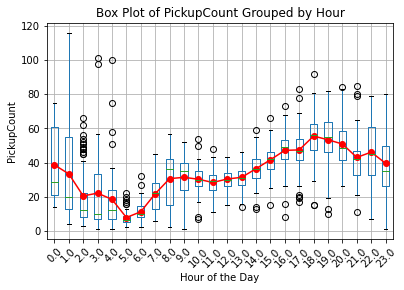

In [25]:

plt.figure(figsize=(4, 4))
train_data.boxplot(column='PickupCount', by='Hour')

plt.title('Box Plot of PickupCount Grouped by Hour')
plt.plot(hourly_means.index+1, hourly_means, color='red', marker='o', label='Hourly Average')# Notice that the X index here need to +1 
plt.suptitle('')  
plt.xlabel('Hour of the Day')
plt.ylabel('PickupCount')
plt.xticks(fontsize=10, rotation=45)
plt.show()

### Revisit simple linear Regression


### Simple linear regression with SK-learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [68]:
# do some data cleaning, the importance of Shape in SK-learn
X_train = train_data['TimeMin'].values.reshape(-1,1)

y_train = train_data['PickupCount'].values



In [69]:
# fit the X_train and y_train wuth the LinearRegression in SK-learn


fitted_cab_model0 = LinearRegression().fit(X_train, y_train)


# make the prediction at each x value

prediction = fitted_cab_model0.predict(X_train)



In [70]:
# print out the R2_score (hint:r2_score(y_train, prediction), or model.score(X_train, y_train))


In [71]:
r2_score(y_train, prediction)

0.24263100669711313

In [72]:
fitted_cab_model0.score(X_train, y_train)

0.24263100669711313

In [73]:
# pull the beta parameters out from model(hint:intercept: modle.intercept_  slope: model.coef_[0];)

beta1_skl = fitted_cab_model0.coef_[0]
beta0_skl =fitted_cab_model0.intercept_

In [74]:
beta1_skl

0.023246257101426294

In [75]:
beta0_skl

16.90064826647528

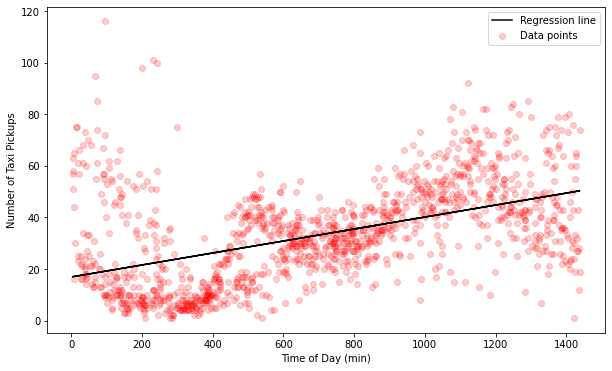

In [76]:
    
# plot the prediction line, and the test data
plt.figure(figsize=(10, 6))

plt.plot(X_train,prediction, color='k', label="Regression line")

plt.scatter(X_train, y_train, color='red', alpha=0.2,label='Data points')

# label your plots
plt.ylabel("Number of Taxi Pickups")
plt.xlabel("Time of Day (min)")
plt.legend()
plt.show()

### Simple linear regression with statsmodels
https://www.statsmodels.org/dev/regression.html

In [98]:
# Add a constant to the independent variable (for the intercept term)
y=y_train
X=X_train
X_with_const = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     399.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.23e-77
Time:                        17:36:26   Log-Likelihood:                -5289.0
No. Observations:                1250   AIC:                         1.058e+04
Df Residuals:                    1248   BIC:                         1.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9006      0.943     17.924      0.0

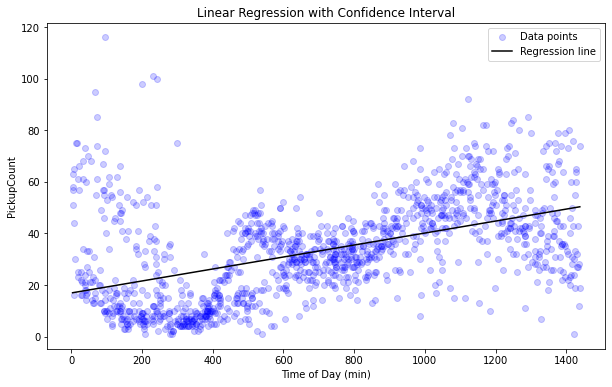

In [99]:
# Generating points for the line
X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_with_const = sm.add_constant(X_plot)

# Predictions for plotting

y_pred = model.predict(X_plot_with_const)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.2,label='Data points')
plt.plot(X_plot, y_pred, color='black', label='Regression line')
plt.xlabel('Time of Day (min)')
plt.ylabel('PickupCount')
plt.title('Linear Regression with Confidence Interval')
plt.legend()
plt.show()

### Simple linear Regression with CI


In [79]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     399.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.23e-77
Time:                        17:31:49   Log-Likelihood:                -5289.0
No. Observations:                1250   AIC:                         1.058e+04
Df Residuals:                    1248   BIC:                         1.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.9006      0.943     17.924      0.0

### model.conf_int() returns the 95% confidence interval 

In [38]:
model.conf_int()

array([[15.05083923, 18.7504573 ],
       [ 0.02096541,  0.0255271 ]])

In [39]:
# to get the 95% confidence interval for the predictions.
ci = model.get_prediction(X_plot_with_const).conf_int()


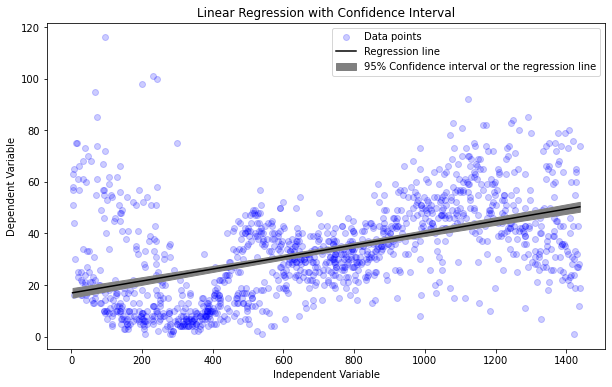

In [80]:
# Predictions for plotting
y_pred = model.predict(X_plot_with_const)

# Confidence interval
ci = model.get_prediction(X_plot_with_const).conf_int()
lower = ci[:, 0] # extracting the lower CI
upper = ci[:, 1] # extracting the upper CI

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.2,label='Data points')
plt.plot(X_plot, y_pred, color='black', label='Regression line')
plt.fill_between(X_plot, lower, upper, color='gray', alpha=1, label='95% Confidence interval or the regression line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression with Confidence Interval')
plt.legend()
plt.show()

### Alternatively, you can also use the  model.get_prediction(X_with_const).summary_frame()
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.PredictionResults.summary_frame.html#statsmodels.regression.linear_model.PredictionResults.summary_frame

In [100]:
predictions = model.get_prediction(X_with_const).summary_frame()

In [101]:
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,36.892429,0.505569,35.900571,37.884288,4.191727,69.593132
1,17.295835,0.925816,15.479507,19.112162,-15.440250,50.031919
2,28.198329,0.534221,27.150259,29.246399,-4.504127,60.900785
3,23.874525,0.664073,22.571703,25.177348,-8.837086,56.586137
4,25.850457,0.598566,24.676151,27.024764,-6.856288,58.557202
...,...,...,...,...,...,...
1245,31.662022,0.477713,30.724812,32.599231,-1.037069,64.361112
1246,30.383477,0.492270,29.417710,31.349245,-2.316444,63.083399
1247,20.596803,0.788205,19.050450,22.143156,-12.125412,53.319019
1248,17.946730,0.897949,16.185074,19.708385,-14.786367,50.679826


In [83]:
data_ci_upp = predictions['obs_ci_upper']
data_ci_low = predictions['obs_ci_lower']
predict_ci_upp = predictions['mean_ci_upper']
predict_ci_low = predictions['mean_ci_lower']

In [104]:
X

array([[860.],
       [ 17.],
       [486.],
       ...,
       [159.],
       [ 45.],
       [762.]])

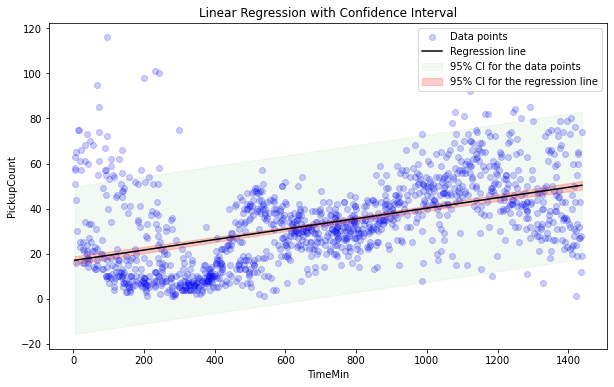

In [112]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.2, label='Data points')
plt.plot(X_plot, y_pred, color='black', label='Regression line')

# CI for the regression line
plt.fill_between(sorted(X.flatten()), sorted(data_ci_low), sorted(data_ci_upp), color='green', alpha=0.05, label='95% CI for the data points')
# X.flatten() means Flatten X to a one-dimensional array

# CI for the data points
plt.fill_between(sorted(X.flatten()), sorted(predict_ci_low), sorted(predict_ci_upp), color='red', alpha=0.2, label='95% CI for the regression line')

plt.xlabel('TimeMin')
plt.ylabel('PickupCount')
plt.title('Linear Regression with Confidence Interval')
plt.legend()
plt.show()

## Part 2: Polynomial Regression

We can see that there's still a lot of variation in cab pickups that's not being caught by a linear fit. 

However, we can add columns to our design matrix for $TimeMin^2$ and $TimeMin^3$ and so on, allowing a wigglier polynomial that will better fit the data.

We'll be using sklearn's `PolynomialFeatures` to take some of the tedium out of building the new design matrix. In fact, if all we want is a formula like $y \approx \beta_0 + \beta_1 x + \beta_2 x^2 + ...$ it will directly return the new design matrix.

In [45]:
from sklearn.preprocessing import PolynomialFeatures


transformer_3 = PolynomialFeatures(3, include_bias=False)
new_features = transformer_3.fit_transform(X_train)
new_features

array([[8.60000000e+02, 7.39600000e+05, 6.36056000e+08],
       [1.70000000e+01, 2.89000000e+02, 4.91300000e+03],
       [4.86000000e+02, 2.36196000e+05, 1.14791256e+08],
       ...,
       [1.59000000e+02, 2.52810000e+04, 4.01967900e+06],
       [4.50000000e+01, 2.02500000e+03, 9.11250000e+04],
       [7.62000000e+02, 5.80644000e+05, 4.42450728e+08]])

In [46]:
X_train

array([[860.],
       [ 17.],
       [486.],
       ...,
       [159.],
       [ 45.],
       [762.]])

A few notes on `PolynomialFeatures`:

- The interface is a bit strange. `PolynomialFeatures` is a 'transformer' in sklearn. We'll be using several transformers that learn a transformation on the training data and then apply that transformation on future data. On these (more typical) transformers it makes sense to have a `.fit()` and a separate `.transform()`. With PolynomialFeatures, the `.fit()` is pretty trivial, and we often fit and transform in one command, as seen above.
- You rarely want to `include_bias` (a column of all 1s), since sklearn will add it automatically and statsmodels can just `add_constant` right before you fit to the design matrix
- If you want polynomial features for a several different variables, you should call `.fit_transform()` separately on each column and append all the results to the design matrix (unless you also want interaction terms between the newly-created features). See `np.concatenate` for joining arrays.

In [47]:
fitted_cab_model3 = LinearRegression().fit(new_features, y_train)

In [48]:
prediction

array([36.89242937, 17.29583464, 28.19832922, ..., 20.59680315,
       17.94672984, 34.61429618])

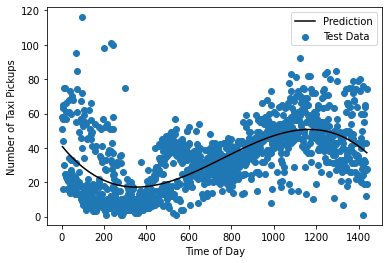

In [49]:
# build the x values for the prediction line
x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

design_mat = transformer_3.fit_transform(x_vals)
prediction = fitted_cab_model3 .predict(design_mat)


# plot the prediction line, and the test data
plt.plot(x_vals,prediction, color='k', label="Prediction")
plt.scatter(X_train, y_train, label="Test Data")

# label your plots
plt.ylabel("Number of Taxi Pickups")
plt.xlabel("Time of Day")
plt.legend()
plt.show()

<div class="exercise"><b>Exercise</b></div>

**Questions**:
1. Calculate the polynomial model's $R^2$ performance. 
2. Does the polynomial model improve on the purely linear model?

In [50]:
# your code here
# r-squared
print("R-squared:", fitted_cab_model3.score(transformer_3.fit_transform(X_train), y_train))

R-squared: 0.3806180261138534


*your answer here*

Yes, the $R^2$ is higher, and the visual fit to both data sets is much better.